In [1]:
import requests

def send_line_notification(message):
    line_token = "9jBlZvpTEg7fQSKaevfKIGU1EQCAxl0SujL7i1pywuQ"
    endpoint = 'https://notify-api.line.me/api/notify'
    message = "\n{}".format(message)
    payload = {'message': message}
    headers = {'Authorization': 'Bearer {}'.format(line_token)}
    requests.post(endpoint, data=payload, headers=headers)

In [33]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import os.path

import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import pandas as pd
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor

#classifier
clf1 = linear_model.LinearRegression()
clf2 = LogisticRegression(random_state=0)
clf3 = RandomForestClassifier(random_state=0)
clf4 = LGBMRegressor()

#パイプライン処理
pipe1 = Pipeline([['sc', StandardScaler()], ['clf1', clf1]])
pipe2 = Pipeline([['sc', StandardScaler()], ['clf2', clf2]])


In [34]:
df_train = pd.read_csv(os.path.join(os.getcwd(),'train_set.csv'), delim_whitespace=False)
df_test = pd.read_csv(os.path.join(os.getcwd(),'test_set.csv'), delim_whitespace=False)


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
df_train["GBA"].fillna(1725.786303972366,inplace=True)
df_train["GRADE"].fillna(df_train["GRADE"].mode(),inplace=True)
df_train["CNDTN"].fillna(df_train["CNDTN"].mode(),inplace=True)

df_train['IsGREAT'] = df_train['GRADE'].apply(lambda x: 1 if x ==("Excellent"or"GRADE_Exceptional-A"or"GRADE_Exceptional-B"or"GRADE_Exceptional-C"or"GRADE_Exceptional-D") else 0)
df_train['IsNew'] = df_train['AYB'].apply(lambda x: 1 if x > 2000 else 0)
df_train['IsRMDL'] = df_train['YR_RMDL'].apply(lambda x: 1 if x > 2000 else 0)
df_train["IsLARGE"] = df_train["LIVING_GBA"].apply(lambda x: 1 if x > 2000 else 0)

df_train.shape
df_train.isnull().sum()


Id                        0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             20053
ROOMS                     0
BEDRM                     0
AYB                      56
YR_RMDL               20418
EYB                       0
STORIES               20071
SALEDATE                  1
QUALIFIED                 0
SALE_NUM                  0
GBA                       0
BLDG_NUM                  0
STYLE                 20053
STRUCT                20053
GRADE                 20053
CNDTN                 20053
EXTWALL               20053
ROOF                  20053
INTWALL               20053
KITCHENS              20053
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             29055
LIVING_GBA            29055
FULLADDRESS           20216
CITY                  20214
STATE                 20214
ZIPCODE             

In [36]:
var = ["GRADE","CNDTN","GBA","IsNew","IsRMDL","IsLARGE"]

X = df_train[var]
X=pd.get_dummies(X)

In [37]:
y = np.log(df_train["PRICE"])

In [39]:
model = pipe1
clf = model
clf.fit(X,y)



/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('sc', StandardScaler(copy=True, with_mean=True, with_std=True)), ['clf1', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)]])

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


(0, 20)

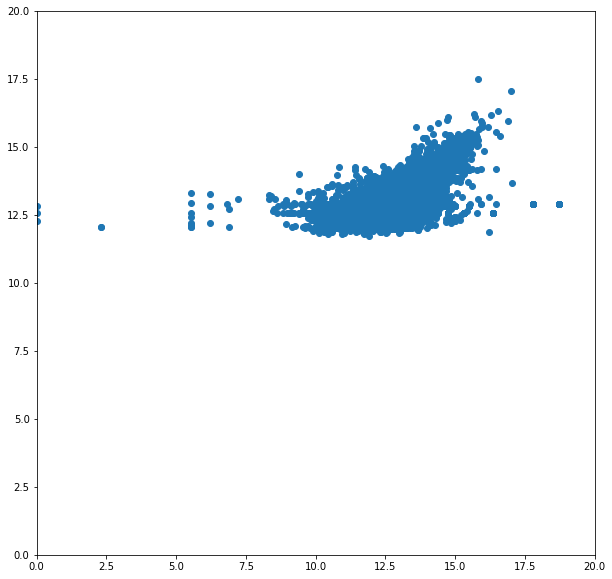

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(y,clf.predict(X))
plt.xlim(0,20)
plt.ylim(0,20)


In [55]:
df_test["GBA"].fillna(1725.786303972366,inplace=True)
df_test["GRADE"].replace({'No Data': pd.np.nan},inplace=True)
df_test["CNDTN"].replace({'Default': pd.np.nan},inplace=True)
df_test['IsNew'] = df_test['AYB'].apply(lambda x: 1 if x > 2000 else 0)
df_test['IsRMDL'] = df_test['YR_RMDL'].apply(lambda x: 1 if x > 2000 else 0)
df_test["IsLARGE"] = df_test["LIVING_GBA"].apply(lambda x: 1 if x > 2000 else 0)

df_train['IsGREAT'] = df_train['GRADE'].apply(lambda x: 1 if x ==("Excellent"or"GRADE_Exceptional-A"or"GRADE_Exceptional-B"or"GRADE_Exceptional-C"or"GRADE_Exceptional-D") else 0)

var = ["GRADE","CNDTN","GBA","IsNew","IsRMDL","IsLARGE"]


In [56]:
X = df_test[var]
X=pd.get_dummies(X)
X.isnull().sum()

GBA                    0
IsNew                  0
IsRMDL                 0
IsLARGE                0
GRADE_Above Average    0
GRADE_Average          0
GRADE_Excellent        0
GRADE_Exceptional-A    0
GRADE_Exceptional-B    0
GRADE_Exceptional-C    0
GRADE_Exceptional-D    0
GRADE_Fair Quality     0
GRADE_Good Quality     0
GRADE_Low Quality      0
GRADE_Superior         0
GRADE_Very Good        0
CNDTN_Average          0
CNDTN_Excellent        0
CNDTN_Fair             0
CNDTN_Good             0
CNDTN_Poor             0
CNDTN_Very Good        0
dtype: int64

In [57]:
y_pred = clf.predict(X)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [58]:
y_pred = np.exp(y_pred)

In [59]:
pred_df = pd.DataFrame(y_pred, index=df_test.Id, columns=["PRICE"])
pred_df.to_csv('./output.csv', header=True, index_label='Id')

In [60]:
y_pred.shape

(49108,)

In [61]:
send_line_notification("FINISH")